<a href="https://colab.research.google.com/github/saniya8858/ML_LAB_49/blob/main/LAB5_49_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [2]:
data = '/content/car_evaluation.csv'

df = pd.read_csv(data, header=None)


In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names


['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [10]:
# check missing values in variables
df.isnull().sum()


,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [11]:
#Declare feature vector and target variable \
X = df.drop(['class'], axis=1)

y = df['class']


In [12]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [13]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [14]:
#Feature Engineering
X_train.dtypes


,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [16]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.5 MB/s eta 0:00:00


In [17]:
import category_encoders as ce

In [18]:
ncoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


NameError: name 'encoder' is not defined

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low


Decision Tree Classifier with criterion gini index

In [27]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier



In [32]:
!pip install scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder  # or OneHotEncoder

# Assuming X_train and X_test are pandas DataFrames
# Identify categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create an OrdinalEncoder object
encoder = OrdinalEncoder() # handle_unknown='use_encoded_value', unknown_value=-1 if needed

# Fit the encoder on training data and transform both train and test data
X_train[categorical_features] = encoder.fit_transform(X_train[categorical_features])
X_test[categorical_features] = encoder.transform(X_test[categorical_features]) # Use the same encoder fitted on training data to ensure consistency

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
y_pred_gini = clf_gini.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.7653


In [35]:
	#Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))




Training-set accuracy score: 0.7744


In [36]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653


[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'gini = 0.619\nsamples = 194\nvalue = [108.0, 21.0, 25.0, 40.0]'),
 Text(0.375, 0.125, 'gini = 0.495\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.425\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 262\nvalue = [116, 28, 118, 0]')]

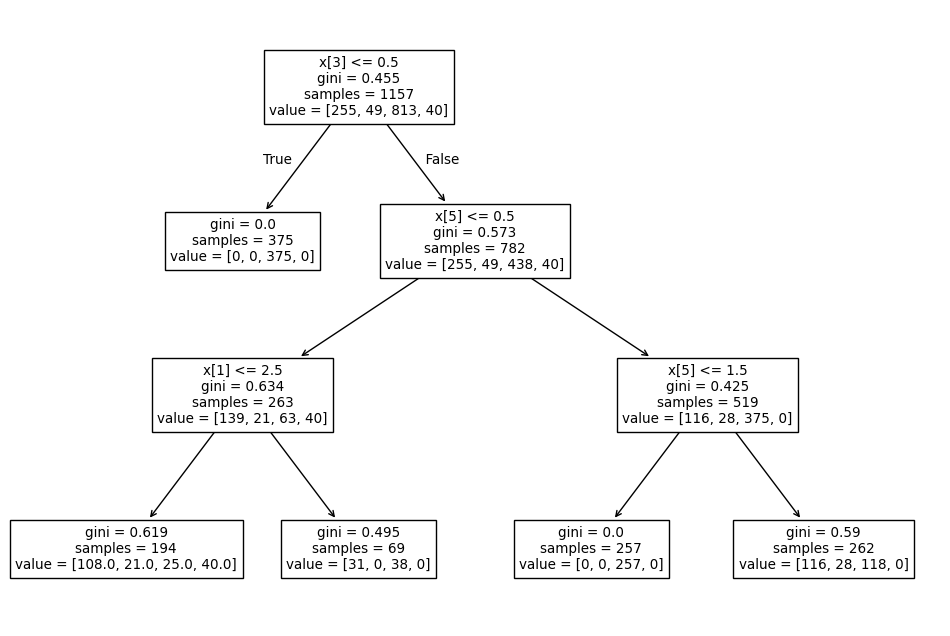

In [37]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))



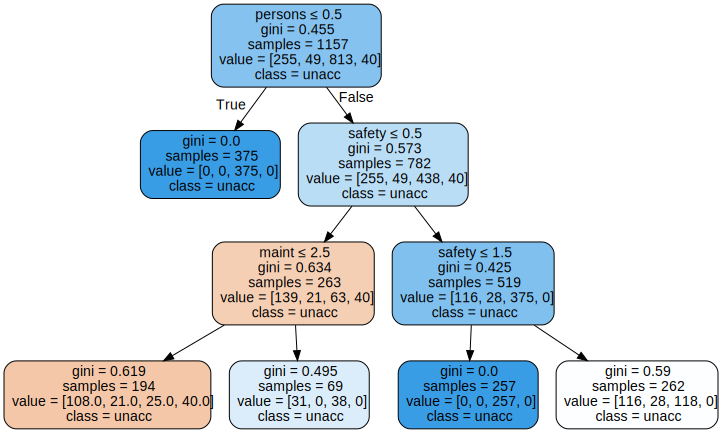

In [38]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Decision Tree Classifier with criterion entropy

In [39]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [40]:
y_pred_en = clf_en.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.7653


In [42]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en


array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [43]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))



Training-set accuracy score: 0.7744


In [44]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))


Training set score: 0.7744
Test set score: 0.7653


[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.465\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[1] <= 2.5\nentropy = 1.684\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'entropy = 1.668\nsamples = 194\nvalue = [108.0, 21.0, 25.0, 40.0]'),
 Text(0.375, 0.125, 'entropy = 0.993\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.049\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'entropy = 1.383\nsamples = 262\nvalue = [116, 28, 118, 0]')]

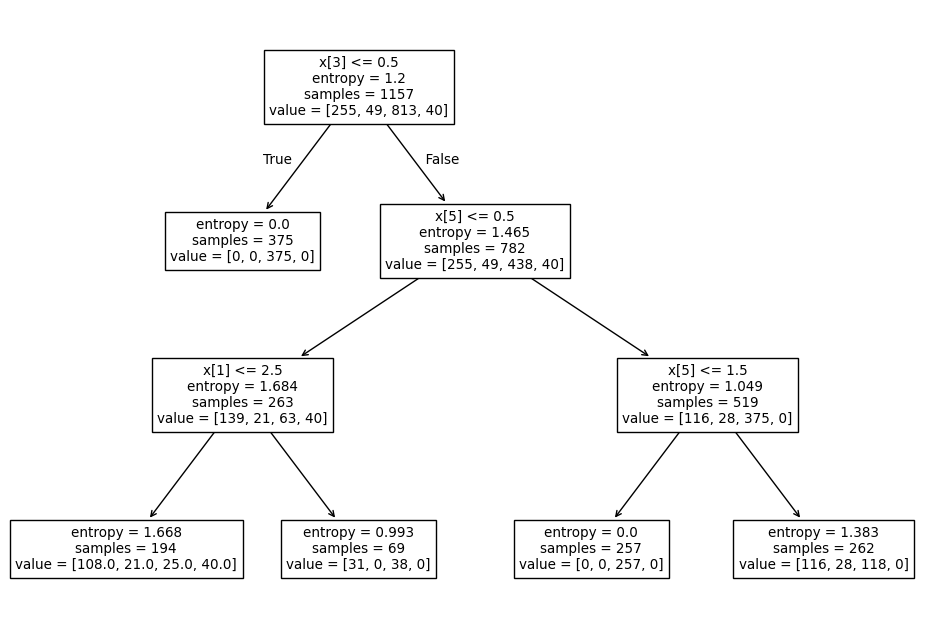

In [45]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))


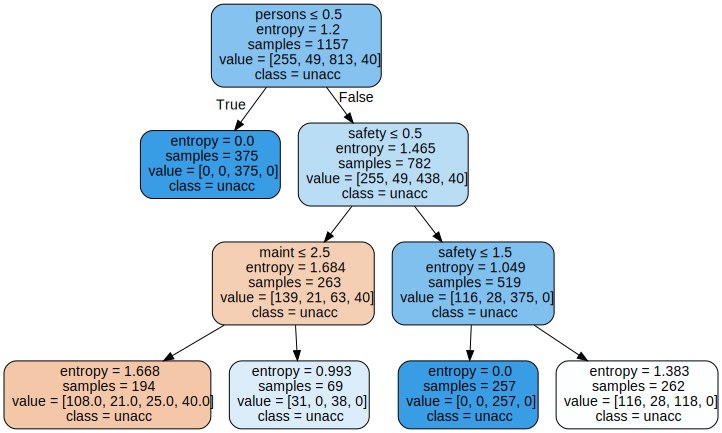

In [46]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 50   0  79   0]
 [  9   0  11   0]
 [ 10   0 387   0]
 [ 25   0   0   0]]


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

         acc       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
       unacc       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
